In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('medQuad_BioASQ.csv')

In [3]:
question_duplicates = df[df['question'].duplicated(keep=False)]['question']
print(question_duplicates.unique())


['Who is at risk for Lymphocytic Choriomeningitis (LCM)? ?'
 'Who is at risk for Alkhurma Hemorrhagic Fever (AHF)? ?'
 'Who is at risk for Marburg hemorrhagic fever (Marburg HF)? ?'
 'Who is at risk for Nocardiosis? ?'
 'Who is at risk for Chapare Hemorrhagic Fever (CHHF)? ?'
 'Who is at risk for Omsk Hemorrhagic Fever (OHF)? ?'
 'Who is at risk for Hendra Virus Disease (HeV)? ?' 'What is (are)  ?'
 'Who is at risk for Crimean-Congo Hemorrhagic Fever (CCHF)? ?'
 'Who is at risk for Lujo Hemorrhagic Fever (LUHF)? ?'
 'Who is at risk for Kyasanur Forest Disease (KFD)? ?'
 'What is (are) Cerebral Palsy ?' 'What is (are) Tuberous Sclerosis ?'
 "What is (are) Bell's Palsy ?" 'What is (are) Thoracic Outlet Syndrome ?'
 'What are the treatments for Machado-Joseph Disease ?'
 'What is the outlook for Machado-Joseph Disease ?'
 'what research (or clinical trials) is being done for Machado-Joseph Disease ?'
 'What is (are) Trigeminal Neuralgia ?' 'What is (are) Aphasia ?'
 'What is (are) Colpoce

In [4]:
num_duplicates = df['question'].duplicated().sum()
print("Number of duplicate questions:", num_duplicates)

Number of duplicate questions: 1428


In [5]:
question_answer_duplicates = df[df.duplicated(subset=['question', 'answer'], keep=False)]
print(f"{len(question_answer_duplicates)} duplicates by question and answer.")
print(question_answer_duplicates)

80 duplicates by question and answer.
                                               question  \
1387                       What is (are) Hypoglycemia ?   
1388                       What is (are) Hypoglycemia ?   
1389            What are the symptoms of Hypoglycemia ?   
1390            What are the symptoms of Hypoglycemia ?   
1391                         What causes Hypoglycemia ?   
...                                                 ...   
2288  What is (are) Kidney Failure: Eat Right to Fee...   
2289  What is (are) Kidney Failure: Eat Right to Fee...   
2290  What is (are) Kidney Failure: Eat Right to Fee...   
2291  What is (are) Kidney Failure: Eat Right to Fee...   
2292  What is (are) Kidney Failure: Eat Right to Fee...   

                                                 answer  
1387  Hypoglycemia, also called low blood glucose or...  
1388  Hypoglycemia, also called low blood glucose or...  
1389  Hypoglycemia causes symptoms such as\n        ...  
1390  Hypoglycemia ca

In [6]:
df_cleaned = df.drop_duplicates(subset=['question', 'answer'], keep='first')
rows_removed = df.shape[0] - df_cleaned.shape[0]
df_cleaned.to_csv("dataset_cleaned.csv")
print(rows_removed)

48


C:\Users\Srikar\AppData\Local\Temp\ipykernel_31316\1693854541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["qa_combined"] = df_cleaned["question"] + " " + df_cleaned["answer"]
C:\Users\Srikar\AppData\Local\Temp\ipykernel_31316\1693854541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["qa_length"] = df_cleaned["qa_combined"].str.split().apply(len)


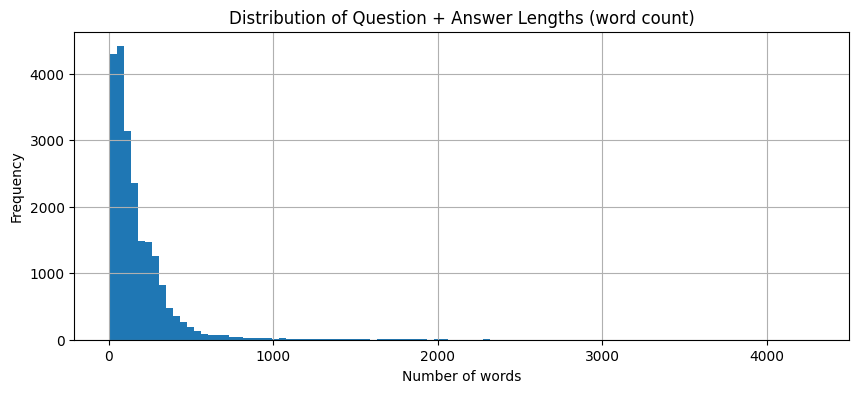

In [7]:
df_cleaned["qa_combined"] = df_cleaned["question"] + " " + df_cleaned["answer"]
df_cleaned["qa_length"] = df_cleaned["qa_combined"].str.split().apply(len)

plt.figure(figsize=(10, 4))
plt.hist(df_cleaned["qa_length"], bins=100)
plt.title("Distribution of Question + Answer Lengths (word count)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


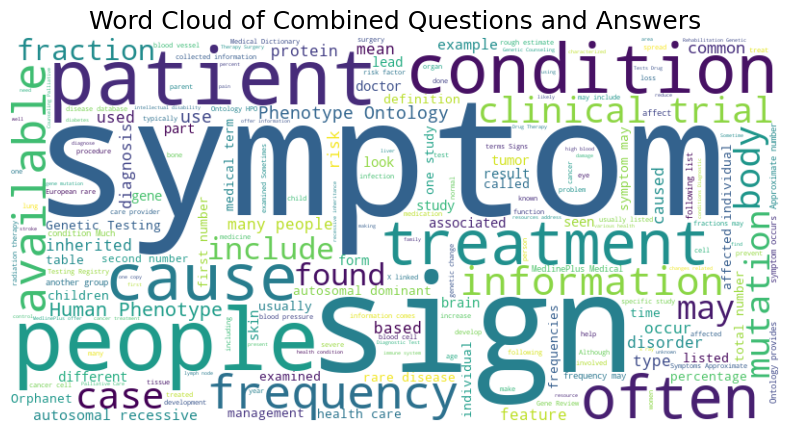

In [8]:
all_text = " ".join(df_cleaned["qa_combined"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Combined Questions and Answers", fontsize=18)
plt.show()